# 0. Contents

* [1. Data](#Data)
    * [Loading data](#loading_data)
* [2. Explore data, general](#explore_data)
    * [Summary statistics](#sum_stat)
    * [Missing data](#missing)
* [3. Explore data, specific](#explore_data_s)
    * [Occupation of lectors](#lectors)
    * [Topics of talks](#topics)
    * [Events, filter to simplify](#events)
    * [Number of views, correlation check](#num_of_views)
    * [Most viewed and most commented talks](#30_most)    
    * [Aggregating by views and comments](#median)
* [4. Ansqering questions](#questions)
    * [Duration distribution](#duration_distribution)
    * [Checking hypotesis about popular talks](#popular)
* [5. ML part](#ML_part)
    * [Prediction of topic by transcript](#prediction)
    * [Clusterization](#clusterization)
* [Conclusion](#Conclusion)
    * [Comments](#section_5_1)
    * [Next steps](#section_5_2)

## Project description
In this project I will explore a dataset of <a href='https://en.wikipedia.org/wiki/TED_(conference)'>TED conference</a> talks, it's diversity, trends and outliers. Also I'll try to build a model to predict talk's topic by it's transcript and model for talks clusterization


** **  
# 1. Data <a class="anchor" id="Data"></a>

<b>TED – Ultimate Dataset from Kaggle:</b>

https://www.kaggle.com/miguelcorraljr/ted-ultimate-dataset

Information regarding the features for the data are located in the `Data Description` section on the website.

### Loading data and libraries <a class="anchor" id="loading_data"></a>

In [2]:
# mounting drive when working on colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import datetime as dt
from scipy.stats import pearsonr
import re
import matplotlib

In [4]:
# local jupiter notebook
teds = pd.read_csv('ted_talks_en.csv')
# working on colab
# teds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TED_project/ted_talks_en.csv')

In [5]:
# after finishing all the work we can do this for better readability
import warnings
warnings.filterwarnings('ignore')

In [6]:
# set figure size
plt.rcParams['figure.figsize'] = [5, 5]

# show unlimited columns
pd.set_option('display.max_columns', None)

** **  
# 2. Explore data  <a class="anchor" id="explore_data"></a>

## 2.0 General exploration

#### Data check <a class="anchor" id="data_check"></a>
Here are few rows to check what kind of information we have in dataset
We will use quantitive values of column <b>`views`, `comments`, `duration`</b>; will explore <b>`events`, `topics`</b> and <b>`occupations`</b> of speakers <br>
In final part we will use <b>`transcript`</b> for clusterization and will try to predict topic by transcript of talk.

In [7]:
teds.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [8]:
print('There are',len(teds), 'talks in our dataset')

There are 4005 talks in our dataset


In [9]:
# exploring data
teds.head(3)
# teds[teds.event.str.contains('TED@')]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


## 2.1 Exploratory Data Analysis 


#### Summary statistics <a class="anchor" id="sum_stat"></a>

In [10]:
teds.info()
teds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


#### Any missing data? <a class="anchor" id="missing"></a>

It is important to check if there are any missing data in our set, we have some missings and will keep it in mind<br>
Luckily <b>`title`, `views`, `published_date`, `event`, `duration`, `topics`</b> and <b>`transcript`</b> have no missings at all.<br> Some missings we have are very minor, less than 0.2% of all set

In [11]:
# check nulls
print('total missings:')
print(teds.isnull().sum().sum())
print('missings by columns (%):')
round(teds.isnull().sum()/len(teds), 2)
# teds.isnull().sum()

total missings:
1685
missings by columns (%):


talk_id           0.00
title             0.00
speaker_1         0.00
all_speakers      0.00
occupations       0.13
about_speakers    0.13
views             0.00
recorded_date     0.00
published_date    0.00
event             0.00
native_lang       0.00
available_lang    0.00
comments          0.16
duration          0.00
topics            0.00
related_talks     0.00
url               0.00
description       0.00
transcript        0.00
dtype: float64

Some speeches view are 0, there are two options: drop them or make some approximation by number of comments.<br> There are only 6 speeches in 4000 set, so I'll drop them

In [12]:
print(teds.views.sort_values()[:8]) # first items by views
# teds[teds.views == 0]
print('zero-length speeches', len(teds[teds.views == 0]))

4004        0
3520        0
3068        0
3056        0
3790        0
2813        0
2732    10004
2753    10356
Name: views, dtype: int64
zero-length speeches 6


In [13]:
teds = teds[teds['views'] !=0] # drop 0 in views

In [14]:
print(teds.views.sort_values()[:3]) # first items by views after dropping 0

2732    10004
2753    10356
3696    10680
Name: views, dtype: int64


# 3. Explore by features <a class="anchor" id="explore_data_s"></a>
Let's explore our data more specific by it's features 

Which native languages our dataset of TED talks include?


In [15]:
# which languages are in set
print('In this project we look only at talks subtitled in English, so there is no surprise that English prevails here')
round(teds['native_lang'].value_counts(normalize=True)*100, 2)

In this project we look only at talks subtitled in English, so there is no surprise that English prevails here


en       98.90
es        0.58
fr        0.23
ja        0.08
hi        0.05
ar        0.03
it        0.03
ko        0.03
zh-cn     0.03
de        0.03
pt        0.03
pt-br     0.03
Name: native_lang, dtype: float64

#### Explore teds by occupation of lectors <a class="anchor" id="lectors"></a>

In [16]:
teds.occupations.head()

0                        {0: ['climate advocate']}
1    {0: ['global health expert; data visionary']}
2                    {0: ['technology columnist']}
3      {0: ['activist for environmental justice']}
4                      {0: ['author', 'educator']}
Name: occupations, dtype: object

There is a list of different occupations for every lector, will try to simplify this from list to one tag

In [17]:
# lectors of which occupations are in set
teds.occupations.unique()
print(teds.occupations.nunique(), 'unique occupation descriptions (lists of tags) in set of', len(teds), 'talks')
occupations_list = list(teds.occupations.dropna())
occupations_list_flat = []

for occup in occupations_list:
    occup = occup.split(': ')[-1]
    occup = re.sub(r'}', '', occup)
    occup = re.sub(r'\'', '', occup)
    occup = re.sub(r'\[', '', occup)
    occup = re.sub(r'\]', '', occup)
    occup = re.split(', |; ', occup)
    for part in occup:
        occupations_list_flat.append(part)

occupations_list_flat = [x.capitalize() for x in occupations_list_flat]
occupations_list_flat_df = pd.DataFrame(occupations_list_flat).rename(columns = {0:'occupation'})

print(occupations_list_flat_df.occupation.nunique(), 'unique occupations after simplification, a lot of unique tags')
print('This list still is too long to categorize all talks by lector occupancy')
print('\nLet\'s look at first 20 popular occupation tags:')
shortlist_occupations = occupations_list_flat_df['occupation'].value_counts().head(20)
print(shortlist_occupations)

2047 unique occupation descriptions (lists of tags) in set of 3999 talks
1761 unique occupations after simplification, a lot of unique tags
This list still is too long to categorize all talks by lector occupancy

Let's look at first 20 popular occupation tags:
Author                 155
Writer                 138
Entrepreneur           100
Artist                  88
Journalist              81
Activist                79
Designer                68
Educator                67
Inventor                59
Neuroscientist          47
Architect               47
Psychologist            46
Economist               37
Filmmaker               37
Physicist               34
Philosopher             31
Musician                31
Photographer            30
Biologist               26
Social entrepreneur     25
Name: occupation, dtype: int64


In [18]:
# some arranges to seaborn layout
sns.set(context='notebook',
        style='whitegrid', 
        palette='deep', 
        font='sans-serif', 
        font_scale=1, 
        color_codes=True)

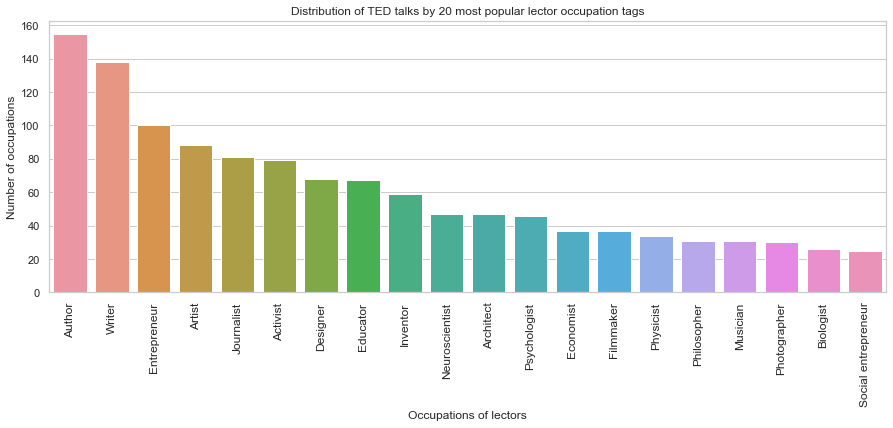

In [19]:
# barplot of popular occupations
plt.subplots(figsize=(15,5))
sns.barplot(x=shortlist_occupations.index, y=shortlist_occupations)
plt.xticks(rotation=90)
plt.title('Distribution of TED talks by 20 most popular lector occupation tags')
plt.xlabel('Occupations of lectors')
plt.ylabel('Number of occupations')
plt.xticks(fontsize=12)
# plt.grid(axis='x', alpha=.4)
plt.show()

<b>remark</b>: it could be usefull to investigate the difference between author and writer, maybe we could union them to one tag

#### Explore talks by topics  <a class="anchor" id="topics"></a>
and filter topics list to get one topic for one talk

In [20]:
print('We can see that teds are labeled by list of topics, \nit could be useful to get simplified table with one topic for each ted speech')
teds.topics.head()

We can see that teds are labeled by list of topics, 
it could be useful to get simplified table with one topic for each ted speech


0    ['alternative energy', 'cars', 'climate change...
1    ['Africa', 'Asia', 'Google', 'demo', 'economic...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['children', 'creativity', 'culture', 'dance',...
Name: topics, dtype: object

In [21]:
# pre-clean of topics by removing some topics from description in dataframe:
# non-relevant values, like 'TEDx', 'TED-Ed'
teds['topics'] = teds['topics'].str.replace('TED Fellows|TEDx|TED-Ed','',regex=True)
# check topics in set
print(teds.topics.nunique(), 'unique topic descriptions in set of', len(teds), 'talks')
topics_list = list(teds.topics)

def clean_topic(topic):
    topic = re.sub(r'\', \'', ',', topic)
    topic = re.sub(r'\[\'', ',', topic)
    topic = re.sub(r'\'\]', '', topic)
    topic = topic.split(',')
    return topic

topics_list_flat = []
topic_len_list = []
for topic in topics_list:
    topic = clean_topic(topic)
    topic_len_list.append(len(topic))
    for part in topic:
        topics_list_flat.append(part)
        
           
topics_list_flat = [i for i in topics_list_flat if len(i) != 0] # remove zero-length elements 
print(len(topics_list_flat), 'topic names, including recurrences')
topic_avg_len = sum(topic_len_list)/float(len(topic_len_list))
print('Average number of topics for one talk:', topic_avg_len)
topics_list_flat_df = pd.DataFrame(topics_list_flat).rename(columns = {0:'topics'})
print('There are', topics_list_flat_df.topics.nunique(),'unique topic names, it\'s pretty long list')
print('Further we will check how many unique topics(categories) still describe significant part of talks')
shortlist_topics = topics_list_flat_df['topics'].value_counts().head(200)
# topics_list_flat_df

3971 unique topic descriptions in set of 3999 talks
30296 topic names, including recurrences
Average number of topics for one talk: 8.91747936984246
There are 467 unique topic names, it's pretty long list
Further we will check how many unique topics(categories) still describe significant part of talks


Here are number of functions to:
1) get an updated dataframe with one topic (more popular in list of all topics) for one talk <BR>
2) get rate of topic popularity for every talk<BR>
3) check how to limit total number of topics and still keep enough talks included in set

In [22]:
# check intersection
def intersection(lst1, lst2):
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    if len(lst3) > 0:
        return True
    else:
        return False

In [23]:
# check intersection and create list of 1&0 / (alpha&0)
def intersection_list(lst1, lst2, alpha):
    result_alpha = []
    for i in lst1:
        if i in lst2:
            result_alpha.append(alpha)
        else:
            result_alpha.append(0)
    return result_alpha

In [24]:
# function to get shortlist of topics sorted by popularity to filter our data further
def get_x_topics_list(df, limit):
    df = df['topics'].value_counts().head(limit)
    return df

In [25]:
def get_popular_topics_df(df_topics, limit):
    # get limited list of topics
    popular_topics_series = get_x_topics_list(df_topics, limit)
    popular_topics = popular_topics_series.index
    
    # make table with rating of popular topics  
    popular_topics_df = pd.DataFrame(popular_topics_series)
    popular_topics_df.reset_index(inplace=True)
    popular_topics_df = popular_topics_df.rename(columns = {'topics':'number', 'index':'topics'})
    popular_topics_df.reset_index(inplace=True)
    popular_topics_df = popular_topics_df.rename(columns = {'index':'rating'})
    
    return popular_topics_df, popular_topics

In [26]:
def filter_topics(value, df_topics, limit):
    
    # get popular df and list of topics
    popular_topics_df, popular_topics = get_popular_topics_df(df_topics, limit)
    
    # return (1)category - most popular from number of topics in specific talk or (2)None if not in popular topics limited list 
    topic = clean_topic(value)
    if intersection(topic, popular_topics):
        topic = clean_topic(value)
        topic = [i for i in topic if len(i) != 0]
        local_topic_df = pd.DataFrame(topic)
        local_topic_df = local_topic_df.rename(columns = {0:'topics'})
        local_topic_df = local_topic_df.set_index('topics').join(popular_topics_df.set_index('topics'), how='left', lsuffix='_lft', rsuffix='_rght')
        win_topic_df = local_topic_df.dropna(axis=0).reset_index()
        win_topic = win_topic_df.topics.iloc[0]
        rating = list((popular_topics_df.loc[popular_topics_df['topics'] == win_topic]).index)[0]
        return win_topic, rating
    else:
        return None

In [27]:
def get_teds_popular_topics(teds, topics_list_flat_df, limit):
    topic_list_for_replace = teds.topics
    new_topic_list = []
    new_rating_list = []
    for i in topic_list_for_replace:
        topic_and_rating = filter_topics(i, topics_list_flat_df, limit)
        if topic_and_rating == None:
            topic, rating = None, None
        else:
            topic, rating = topic_and_rating[0], topic_and_rating[1]
        new_topic_list.append(topic)
        new_rating_list.append(rating)

    # put new simplifyed topic list in dataframe 
    teds_popular_topics = teds.copy()
    teds_popular_topics['topics_clean'] = pd.Series(new_topic_list)
    teds_popular_topics['topics_rating'] = pd.Series(new_rating_list) #changed from topics_category
    teds_popular_topics = teds_popular_topics.dropna(axis=0, subset=['topics_clean'])
    teds_popular_topics.reset_index(inplace=True)
    
    print(len(teds_popular_topics), 'total TED talks in result list')
    print(teds_popular_topics.topics_clean.nunique(), 'categories')
    print()
    print('Number of talks by categories: \n(by limited popular topics list)')
    print(teds_popular_topics.topics_clean.value_counts())

    return teds_popular_topics

In [28]:
# apply function to set one most popular topic from description for one ted speech:
# to get less categories in total
limit = 20
teds_popular_topics_20 = get_teds_popular_topics(teds, topics_list_flat_df, limit)

3730 total TED talks in result list
20 categories

Number of talks by categories: 
(by limited popular topics list)
business         388
culture          359
science          310
animation        270
global issues    236
art              235
design           232
communication    197
health           187
biology          187
education        162
technology       157
creativity       156
entertainment    143
history          119
social change    105
future            99
humanity          91
society           59
innovation        38
Name: topics_clean, dtype: int64


In [29]:
# make a function to check best number for limit parameter of popular topics
def check_len_of_table_by_limit(topic_list_for_replace, limit):
    # replace topics list by one most popular topic (to get less categories in total)
    new_topic_list = []
    # limit to crop original popular topic list
    for i in topic_list_for_replace:
        topic = filter_topics(i, topics_list_flat_df, limit)
        new_topic_list.append(topic)
    # replace topics in dataframe with new simplifyed topic list
    teds_popular_topics = teds.copy()
    teds_popular_topics['topics_clean'] = pd.Series(new_topic_list)
    teds_popular_topics.dropna(axis=0, inplace=True, subset=['topics_clean'])
    teds_popular_topics.reset_index(inplace=True)
    # teds_popular_topics
    table_len = len(teds_popular_topics)
    categories_len = teds_popular_topics.topics_clean.nunique()
    return table_len, categories_len

In [30]:
# *** to save processing time I saved all resulted values to the next cell ***
# check different number of teds by limiting different categories number

# lengths_list = []
# categories_len_list = []
# for i in range(5, 201, 5): 
#     table_len, categories_len = check_len_of_table_by_limit(teds.topics, i)
#     lengths_list.append(table_len)
#     categories_len_list.append(categories_len)

In [31]:
# all values from previous cell
lengths_list = [1937, 2614, 3119, 3293, 3465, 3572, 3630, 3678, 3724, 3745, 3825, 3853, 3864, 3880, 3893, 3905, 3918, 3932, 3940, 3942, 3948, 3952, 3954, 3957, 3961, 3964, 3967, 3969, 3974, 3974, 3976, 3978, 3982, 3983, 3987, 3987, 3987, 3989, 3990, 3990]
categories_len_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 79, 84, 89, 94, 99, 104, 109, 114, 119, 123, 127, 132, 137, 142, 147, 152, 157, 161, 165, 170, 174, 179, 184, 187, 190]

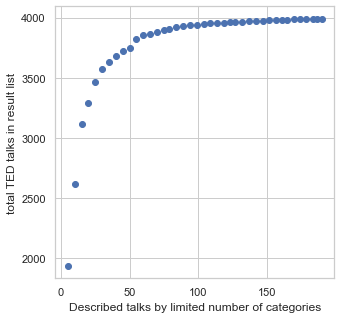

20 categories looks like a good option, 
our set still big enough, about 3300 teds
We will use it in ML part further


In [32]:
# check limit parameter vs set length
plt.scatter(categories_len_list, lengths_list)
plt.ylabel('total TED talks in result list')
plt.xlabel('categories')
plt.xlabel('Described talks by limited number of categories')
plt.show()
print('{} categories looks like a good option, \nour set still big enough, about {} teds'.format(limit, round(lengths_list[categories_len_list.index(limit)],-2)))# limit format
print('We will use it in ML part further')

For now we will use 20 categories to describe most of the talks. All the talks without any from 20 most popular topics are dropped. <br>We also can increase a number of categories to keep more talks for another analysis.


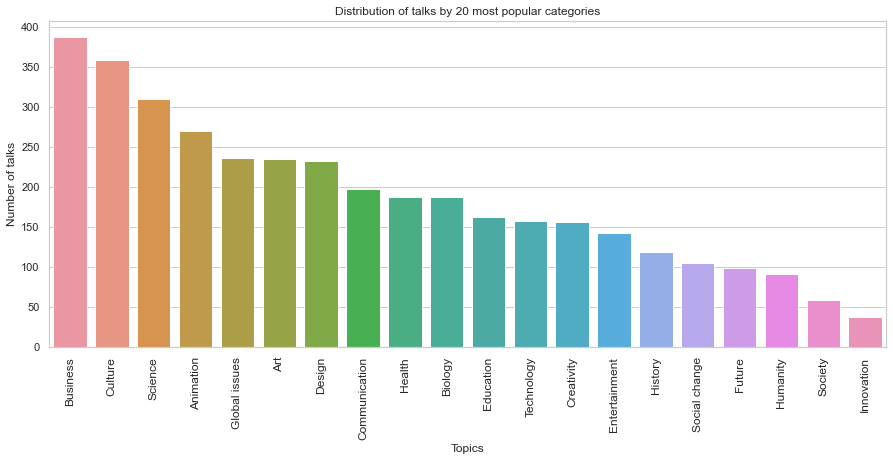

In [33]:
# barplot of popular categories
plt.subplots(figsize=(15,6))
sns.barplot(x=teds_popular_topics_20.topics_clean.value_counts().index.str.capitalize(),
            y=teds_popular_topics_20.topics_clean.value_counts().values)
plt.xticks(rotation=90)
plt.title('Distribution of talks by {} most popular categories'.format(limit))
plt.xlabel('Topics')
plt.ylabel('Number of talks')
plt.xticks(fontsize=12)
plt.show()

Here we observe a distribution of talks after simplifying it's topic description. <br>Interesting where we find three topics presented in the name of conference itself - <b>T</b>echnology, <b>E</b>ntertainment, <b>D</b>esign: <br>there are at places 12, 14 and 7 respectively 

### Explore talks by events, number of views and comments 

#### Explore events <a class="anchor" id="events"></a>

In [34]:
#check unique events by number of views
# teds.groupby(['event'], axis=0).mean().sort_values(by='views', ascending=False)

In [35]:
teds.event.unique()#[:50]

array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009',
       'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU',
       'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam',
       'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED',
       'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes',
       'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010',
       'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC',
       'TEDxChan

In [36]:
print('There are {} event names here'.format(teds.event.nunique()))
print('We have to get rid of years suffix in event names to get more readable data and convert dates to date format')

There are 459 event names here
We have to get rid of years suffix in event names to get more readable data and convert dates to date format


In [37]:
# convert date to date format and check nulls
datetime_cols = ['published_date', 'recorded_date']
teds[datetime_cols] = teds[datetime_cols].apply(pd.to_datetime, format='%Y-%m-%d')
# sort by published date
teds_date = teds.sort_values(by='published_date')
# clean from years and some other repetative names to get more clean categories
teds_date['event_flat'] = teds_date.event.str.replace(r"\d{4}", "", regex=True).str.strip()
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"^TEDx(.*)?", "TEDx", regex=True)
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"EG", "EG conference", regex=True)
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"^TED@(.*)?", "TED@", regex=True)
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"^TED Salon(.*)?", "TEDSalon", regex=True)
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"^TEDSalon(.*)?", "TEDSalon", regex=True)
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"^TEDGlobal(.*)?", "TEDGlobal", regex=True)
print('There are only {} events names now, after removal of year suffixes'.format(teds_date.event_flat.nunique()))
teds_date.tail(3)
# teds_date.info()

There are only 57 events names now, after removal of year suffixes


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,event_flat
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['', 'education', 'history', 'animation', 'int...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",TED-Ed
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,TEDx
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['', 'education', 'animation', 'United States'...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",TED-Ed


Now we made a column <b>`event_flat`</b> with clean event name without year suffix

In [38]:
#check unique events and sort by dominance
ted_sorted = teds_date.groupby(['event_flat'], axis=0).count().sort_values(by='talk_id', ascending=False)
# len(ted_sorted)
# ted_sorted

In [39]:
limit_num_list = 15
ted_sorted_short = ted_sorted.head(limit_num_list)
ted_sorted_short_list = list(ted_sorted_short.index)
# ted_sorted_short
print(ted_sorted_short_list)

['TED', 'TEDx', 'TED-Ed', 'TEDGlobal', 'TEDWomen', 'TED@', 'TEDSalon', 'TEDMED', 'TEDSummit', 'TED Residency', 'TEDIndia', 'TEDNYC', 'EG conference', 'TEDYouth', 'TED Talks Live']


Let's plot barchart with number of different events happened:

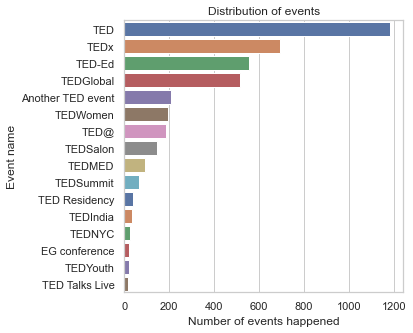

There are 15 most presented events and the rest are aggregated in "Another TED event"


In [40]:
# All rest events will get a name 'Another TED event'
teds_date['event_flat'] = teds_date['event_flat'].apply(lambda x: 'Another TED event' if x not in ted_sorted_short_list else x)
teds_date['published_date'] = pd.to_datetime(teds_date['published_date'])
# display events by number
events_limited = teds_date.groupby(['event_flat'], axis=0)['talk_id'].count().sort_values(ascending=False)#.head(limit_num_list)
events_limited = events_limited.rename('Number')

sns.barplot(y=events_limited.index, x=events_limited.values, palette='deep')
plt.title('Distribution of events')
plt.ylabel('Event name')
plt.xlabel('Number of events happened')
plt.show()
print('There are 15 most presented events and the rest are aggregated in "Another TED event"')
# events_limited
# events_limited.sum()

There is no surprise that the classic <b>TED</b> have more events, following by <b>TEDx</b>.<br> It was new for me - an amount of <b>TED-Ed</b> events

#### Explore talks by number of views<br> <a class="anchor" id="num_of_views"></a>

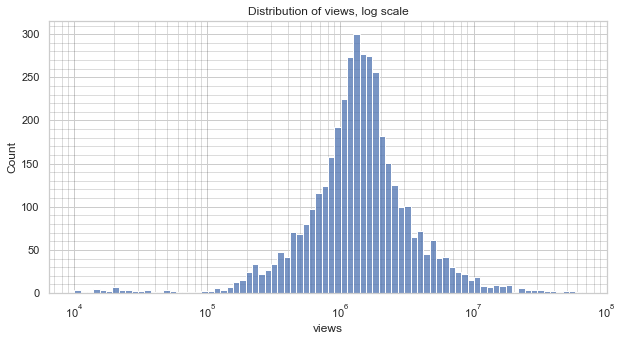

Number of views distributed exponentially
Median number of views is 1376590
There are only 89 TEDs with more than 10000000 views in 3999 TEDs


In [41]:
# Plot histogramm of views
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True)
plt.subplots(figsize=(10,5))
plt.title('Distribution of views, log scale')
sns.histplot(teds.views, log_scale=True)
plt.grid(color='k', linestyle='-', linewidth=1, alpha=.15, which='minor')
plt.minorticks_on()
plt.show()

limit_number = 10000000
teds_super = teds[teds.views > limit_number]
# teds_normal = teds[teds.views <= limit_number]
print('Number of views distributed exponentially')
print('Median number of views is {}'.format(int(teds.views.median())))
print('There are only',len(teds_super), 'TEDs with more than', limit_number, 'views', 'in',len(teds), 'TEDs')

If a number of views correlates with publishing date, we have to make corrections to compare properly a talk from a decade age to new one. Will check it now

In [42]:
# check date vs number of views to get general impression of expiration bias
teds_date['published_date_int'] = teds_date['published_date'].apply(lambda x: x.value)
start_date = teds_date['published_date_int'].iloc[0]
teds_date['published_date_int'] = round((teds_date['published_date_int'] - start_date)/10**14,0).astype(int)

# compare views vs duration - correlation
palette='deep'
corr, _ = pearsonr(teds_date.views, teds_date.published_date_int)
corr_r = round(corr, 2)
print('Correlation is ', corr_r, ', looks like there is no correlation between date and number of views.', sep='')
print('So there is no need to do correction of views to compare different years')


Correlation is -0.06, looks like there is no correlation between date and number of views.
So there is no need to do correction of views to compare different years


Now we can compare all talks by number of views, plotted by year and by event type 

In [43]:
# function to remap colors by events lists
def remap_clr_list_by_two_lists(original_list, second_list, clr_list):
    enum_original_list = list(enumerate(original_list))
    new_indexes = [[j[0] for j in enum_original_list if i in j] for i in second_list]
    new_indexes = [item for items in new_indexes for item in items]
    second_list_clr = [clr_list[x] for x in new_indexes]
    return second_list_clr, new_indexes

In [44]:
# prepare df and colors #colors get wrong number
teds_date_cropped = teds_date[teds_date.views <= 10000000]
clr_deep = list(sns.color_palette('deep', teds_date_cropped.event_flat.nunique()))
# convert rgb to hex
hex_clr = [matplotlib.colors.to_hex(i) for i in clr_deep] 
# reorder colors for new plot for coherence
rmp_clr, _ = remap_clr_list_by_two_lists(events_limited.index, teds_date_cropped.event_flat.unique(), hex_clr)

In [46]:
# plot views by date, colored
# from plotly.graph_objs import *
fig = px.scatter(teds_date_cropped,
                 x='published_date',
                 y='views',
                 color='event_flat',
                 hover_data = ['title'],
                 color_discrete_sequence=rmp_clr,
                 labels={
                     'published_date': 'Published date',
                     'views': 'Number of views',
                     'event_flat': 'Event name',
                     'title': 'Title'
                 },
                title='Number of views by year and event name (by color), limited by 10,000,000 views',
                width=950, height=650,
                template='plotly_white'
                )
fig.show()
print('Here we can see that more views in 2019 it is TED-Ed, 2012 low-viewed area is mostly TEDx')

Here we can see that more views in 2019 it is TED-Ed, 2012 low-viewed area is mostly TEDx


There are some interesting areas on the plot: more views from <b>TED-Ed</b> near 2019, some low-views of <b>TEDx</b> at 2012. Global trend from 2006 to 2018 is growing of average and minimal views number. From 2018 there are a lot of low-viewed talks, it could look like there are just new and will go "up" in near future, but hard to find this trace between 2016-2018 years. <br>We can see the "arc" over 2018-2019. <br>It's important to remember that those values are dynamic and even old talks will get more views in future.

#### Most viewed and most commented talks
<a class="anchor" id="30_most"></a>
Let's look at some talks not presented in previous plot, the most viewed group :

In [47]:
# 30 first from sorted by views
# print('30 more viewed talks:')
# teds_sorted.title.head(30)

In [48]:

# date_list

In [49]:
def n_talks_by(teds_date, lim, field, sec_field): # palette crest or muted
    plt.subplots(figsize=(8,9))
    teds_sorted = teds_date.sort_values(by=field, ascending=False).reset_index()
    if field == 'views':
        units = ', tens millions'
        palette = 'Greens'
        color = (0,0,.5)
    else:
        units = ''
        palette = 'muted'
        color = (.1,.4,.1)
    main_list = list(teds_sorted.title.head(lim))
    second_list = list(teds_date.sort_values(by=sec_field, ascending=False).reset_index().title.head(lim))
    result_alpha = intersection_list(main_list, second_list, .6)
    g = sns.barplot(data=teds_sorted.head(lim), 
                    x=field, 
                    y='title', 
                    palette=sns.color_palette(palette, 1), 
                    alpha=.4)
    Field = field.capitalize()
    fielded = field[:-1]+'ed'
    sec_fielded = sec_field[:-1]+'ed'
    plt.ylabel('TED talk title')
    plt.xlabel(f'{Field}{units}')
    plt.title(f'{lim} more {fielded} TED talks')
    plt.xticks(fontsize=11)
    # show values and names on barplot
    date_list = list((pd.to_datetime(teds_sorted.published_date.head(lim)) - dt.datetime(2000,1,1)).dt.total_seconds()/10000000)
    # date_list = [int(x) for x in date_list]
    maxclr = max(date_list)
    clrlist = [x/maxclr for x in date_list]
    rgba = [(1-x, x/2, x/2, 1) for x in clrlist]
    
    # add texts
    for index in range(lim):
        g.text(0, 
               index+0.28,
               teds_sorted.head(lim).published_date.dt.year.iloc[index], 
               color=rgba[index], 
               weight='bold')
        g.text(0, 
            index+0.28,
            '        '+teds_sorted.head(lim).event_flat.iloc[index],
            color=rgba[index]) 
        g.text(0, 
            index+0.28,
            f'                             [highly {sec_fielded}]',
            color=color, 
            alpha=result_alpha[index]) 
    plt.show()

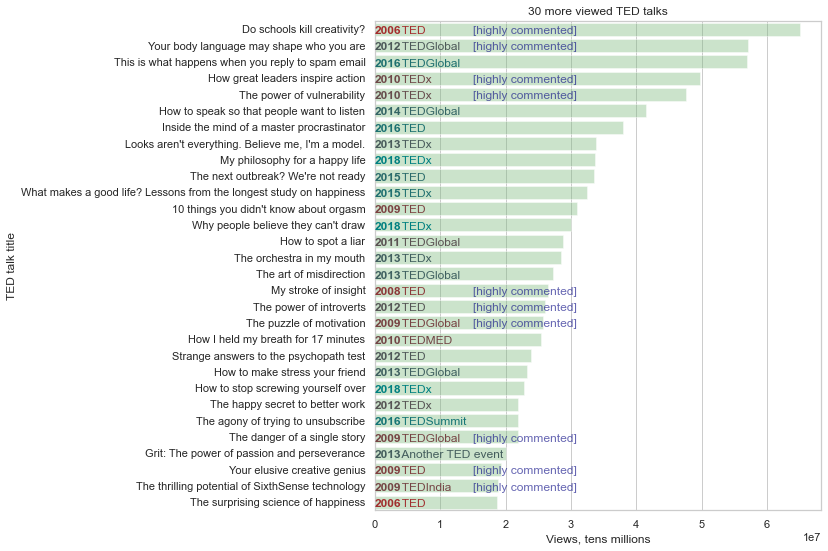

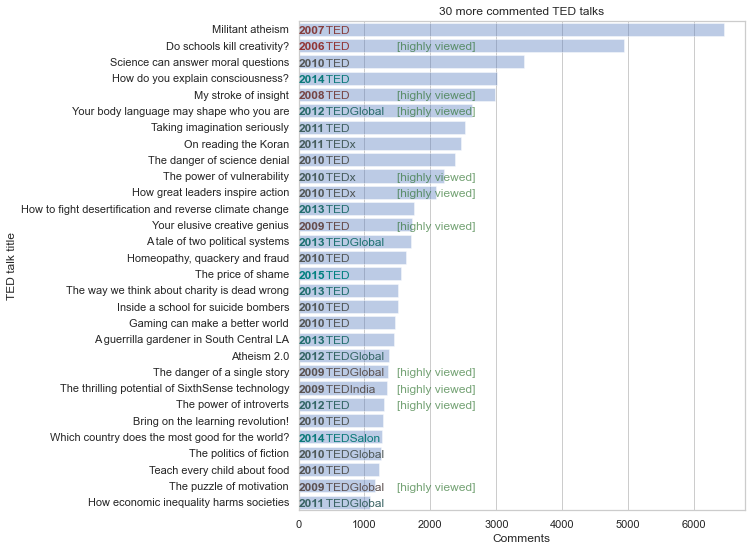

In [50]:
n_talks_by(teds_date, 30, 'views', 'comments')
n_talks_by(teds_date, 30, 'comments', 'views')

It's mportant to remember that some talks are older and partly it explains higher place in chart. Both chart's leaders are watched and commented for many years already. So older talks marked by red color of year and event name.<br>

There are 10 talks presented in both charts, marked by text [highly...]<br>
It's only one third of talks, maybe those two parameters connected less than I thought. We will check a correlation (for even more parameters) later, for now let's aggregate median views and comments by events, maybe they have some different trends<br>
Plotting those values without aggregation looks too noisy.

In [51]:
# function to remap colors by events lists
# def remap_clr_list_by_two_lists(original_list, second_list, clr_list):
#     enum_original_list = list(enumerate(original_list))
#     new_indexes = [[j[0] for j in enum_original_list if i in j] for i in second_list]
#     new_indexes = [item for items in new_indexes for item in items]
#     second_list_clr = [clr_list[x] for x in new_indexes]
#     return second_list_clr, new_indexes

#### Aggregating by views and comments <a class="anchor" id="median"></a>

In [52]:
# prepare data #
teds_sorted = teds_date.sort_values(by='views', ascending=False).reset_index()
views_by_events_median = teds_sorted.groupby('event_flat')['views'].median().sort_values(ascending=False)
comments_by_events_median = teds_sorted.groupby('event_flat')['comments'].median().sort_values(ascending=False)
# make dfs
comments_by_events_median = pd.DataFrame(comments_by_events_median).reset_index()
views_by_events_median = pd.DataFrame(views_by_events_median).reset_index()
# merge dfs
com_view_by_events_median = comments_by_events_median.merge(views_by_events_median, left_on='event_flat', right_on='event_flat').reset_index()
com_view_by_events_median = com_view_by_events_median.join(pd.DataFrame(events_limited), on='event_flat')
# prepare colors for palette
# clr_husl = list(sns.husl_palette(n_colors=len(views_by_events_median.index), h=0.01, s=0.9, l=0.65, as_cmap=False))

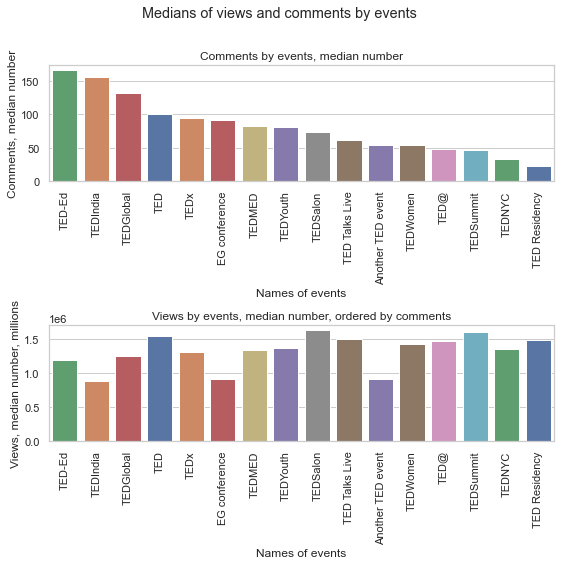

In [53]:
# Show views and comments medians by events 
fig, axs = plt.subplots(2, 1, figsize=(8,8))
fig.suptitle('Medians of views and comments by events\n')

palette, _ = remap_clr_list_by_two_lists(events_limited.index, com_view_by_events_median.event_flat, clr_deep)
# palette = clr_deep

sns.barplot(data=com_view_by_events_median,
            x='event_flat',
            y='comments',
            ax=axs[0], 
            palette=palette)

sns.barplot(data=com_view_by_events_median,
            x='event_flat',
            y='views',
            ax=axs[1], 
            palette=palette)

plt.sca(axs[0])
plt.xticks(rotation=90)
plt.sca(axs[1])
plt.xticks(rotation=90)
axs[0].title.set_text('Comments by events, median number')
axs[1].title.set_text('Views by events, median number, ordered by comments')
xlabel = 'Names of events'
axs[0].set_xlabel(xlabel)
axs[1].set_xlabel(xlabel)
axs[0].set_ylabel('Comments, median number')
axs[1].set_ylabel('Views, median number, millions')
plt.tight_layout()
plt.show()

Here we observe that comment and views are not behaving the same, let's view another plot to observe it

In [54]:
# teds_date_cropped.groupby(['event_flat'])['views'].median().index
# teds_date_cropped.groupby(['event_flat'])['comments'].median()
# teds_date_cropped

In [55]:
hex_clr_med, _ = remap_clr_list_by_two_lists(list(events_limited.index), list(comments_by_events_median.event_flat), hex_clr)
fig = px.scatter(com_view_by_events_median,
           x = 'comments',
           y = 'views',
           color = 'event_flat',
           color_discrete_sequence=hex_clr_med,
#            hover_name='event_flat',
           size='Number',
           text='event_flat',
           hover_data = {'comments': True,
                         'views': True,
                        'event_flat': False,
                        },   
           labels={
                     'event_flat' : 'Name of event:',  
                     'comments': 'Median comments by events',
                     'views': 'Median views by events',
#                      'color': 'Event name',
                     'Number': 'Number of events happened'
                 },
           width=950, height=750,
           template='plotly_white'
           )
fig.update_traces(textposition='bottom center')
fig.update_xaxes(range=[0, 180])
fig.update_yaxes(range=[800000, 1800000])
fig.show()

Plotting views and comments per talk don't clarify the picture so much, but after aggregating by median we can see - there is main trend around <b>TED/TEDx/TEDMED</b> and interesting outliers:
* <b>TED Residency</b> events have less comments, but very viewed, almost like classic TED events
* <b>TEDIndia</b> have less views, but highly commented, more than every other, except TED-Ed

In [56]:
# noisy data without aggregation, not worth it # maybe aggregate by topic?
# fig = px.scatter(teds_num_clean,
#                  x='comments',
#                  y='views',
#                  color='topics_clean',
# #                  hover_data = 'title',
#                  color_discrete_sequence=hex_clr,
#                  labels={
#                      'comments': 'Number of comments',
#                      'views': 'Number of views',
#                      'topics_clean': 'Topic',
#                      'title': 'Title'
#                  },
#                 title='Number of views vs comments and topic (by color), limited by 10,000,000 views',
#                 width=950, height=650,
#                 template='plotly_white'
#                 )
# fig.update_xaxes(range=[0, 400])
# fig.update_yaxes(range=[800000, 1800000])
# fig.show()

In [57]:
# compare views and comments between topics
teds_num = teds_popular_topics_20[['views', 'comments', 'topics_clean', 'topics_rating']]#.sort_values('comments')
# teds_num_clean = teds_num.dropna()
def boxplot_field(df, field, ylim):
    plt.subplots(figsize=(14,8))
    sns.boxplot(data=df, x=df.sort_values('topics_rating').topics_clean.str.capitalize(), y=field)
    plt.xticks(fontsize=12, rotation=90)
    plt.title(f'Distribution of {field} number by topics')
    plt.xlabel('Topics')
    global_median = df[field].median()
    plt.axhline(y=global_median, color='black', linestyle='--', linewidth=.7)
    plt.text(0, global_median+global_median*.05, 'Median')#, fontdict={'color': 'gray'})
    plt.ylabel(f'Number of {field}')
    plt.ylim(0, ylim)
    plt.show()

In [58]:
# teds_num.groupby('topics_clean').median().sort_values('topics_rating')

Another way to look at same values is to group them by topic, ordered by topig rating

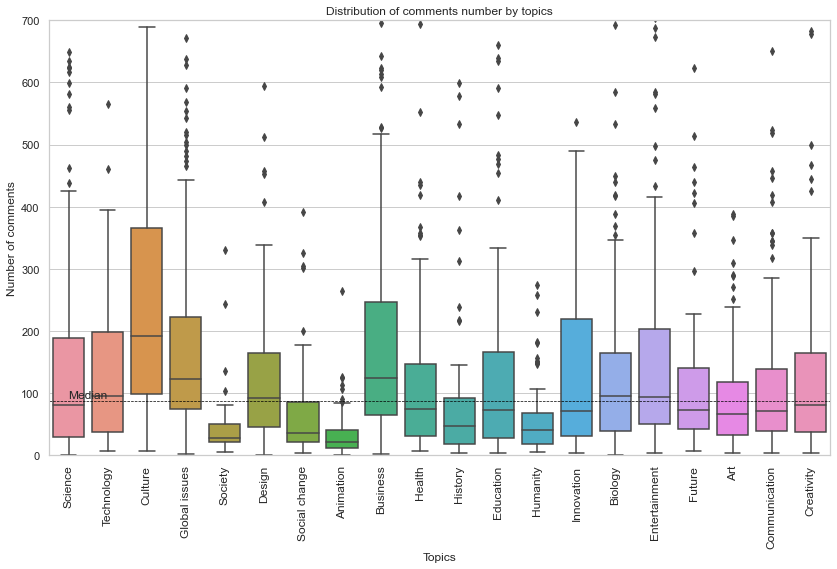

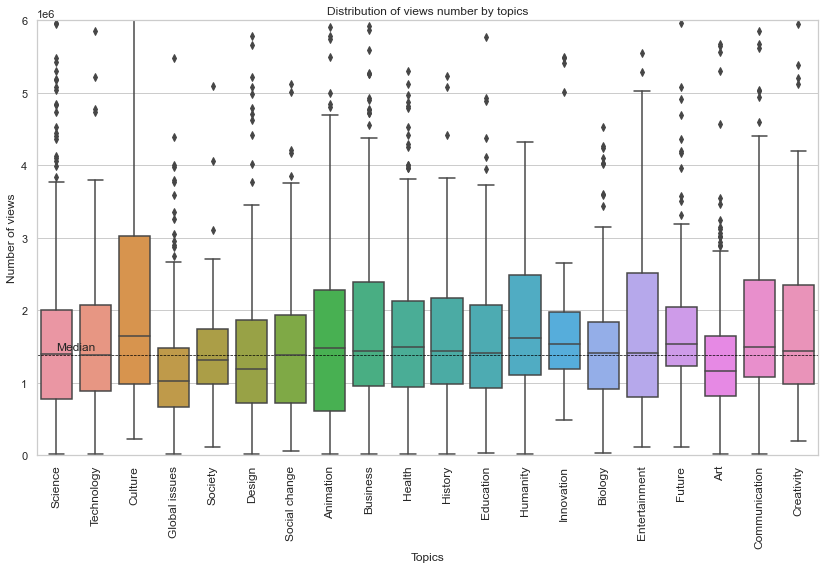

In [59]:
boxplot_field(teds_num, 'comments', ylim=700)
boxplot_field(teds_num, 'views', ylim=6000000)

We can see on the first chart that <b>Culture</b> and <b>Buisinnes</b> are highly commented, also part of talks about <b>Innovation</b>.<br>Topics like <b>Animation</b>, <b>Society</b> and <b>Humanity</b> have less comments. Easy to understand why <b>Animation</b> have less comments, but the others are harder to explain, maybe the reason is just less talks at topic generally<br>Looking on the second chart we see that medians of views are far more homogeneous. I find it very illustrative that topics like <b>Animation</b>, <b>Entertainment</b> and <b>Humanity</b> have a lot of views. <b>Animation</b> and <b>Entertainment</b> it's about views, not about comments. Why <b>Humanity</b> is so viewed but no so discussed? Maybe we like to send to each other talks about humanity more, than argue about it in comments. 

** **  
# 3. Answering questions <a class="anchor" id="questions"></a>

### Comparing views vs duration, duration distribution and checking some hypotesys

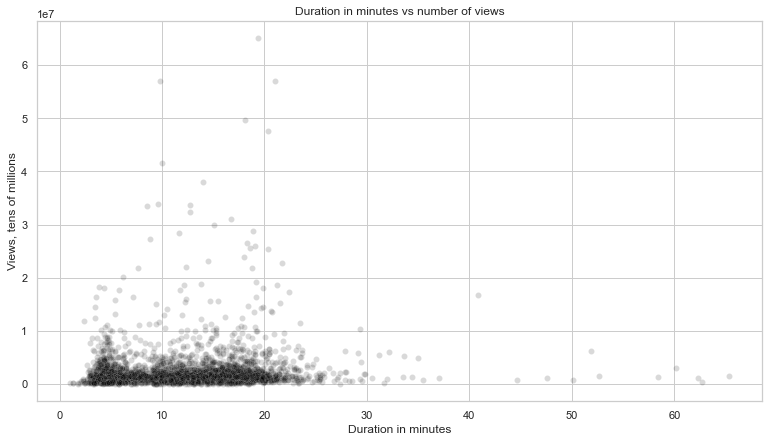

Correlation coefficient is 0.07, too low to be something significant


In [60]:
# setting table with duration in minutes
teds_date_cropped['duration_min'] = teds_date_cropped['duration'].div(60)
# compare views vs duration 
plt.subplots(figsize=(13,7))
sns.scatterplot(y='views', x=teds.duration.div(60), data=teds, alpha=.15, color='0')
plt.title('Duration in minutes vs number of views')
plt.ylabel('Views, tens of millions')
plt.xlabel('Duration in minutes')
plt.show()
# compare views vs duration - correlation
corr, _ = pearsonr(teds.views, teds.duration)
corr_r = round(corr, 2)
print('Correlation coefficient is ', corr_r, ', too low to be something significant', sep='')
# no correlation

Interesting, that distribution doesn't look as a normal even without outliers, there are at least two peaks of view's number: on 5 minutes and near 15 minutes, maybe it's about event format. <br>Let's plot it by events and without outliers: drop everything more than 30 minutes long and more than 10,000,000 views

#### Duration distributions <a class="anchor" id="duration_distribution"></a>
Are talks at some event shorter than others? 

In [61]:
# check it with plotly
teds_cropped_30min = teds_date_cropped[teds_date_cropped.duration_min <= 30]
teds_cropped_30min_10mln = teds_cropped_30min[teds_cropped_30min.views <= 10000000]
rmp_clr, _ = remap_clr_list_by_two_lists(list(events_limited.index), list(teds_cropped_30min_10mln.event_flat.unique()), hex_clr)

fig = px.scatter(teds_cropped_30min_10mln,
                 y='views',
                 x='duration_min',
                 color='event_flat',
                 hover_data = ['title'],
                 color_discrete_sequence=rmp_clr,
                 labels={
                     'views': 'Number of views',
                     'duration_min': 'Duration in minutes',
                     'event_flat': 'Event name',
                     'title': 'Title'
                 },
                title='Duration in minutes vs number of views, limited by 10,000,000 views and 30 minutes length',
                width=950, height=650,
                template='plotly_white'
                ).update_layout(yaxis_title='Number of views', xaxis_title='Duration in minutes'
                )
fig.show()

Here we can see again how <b>TED-Ed</b> stands out

Let's check a histogram of durations distridution with and without TED-Ed event



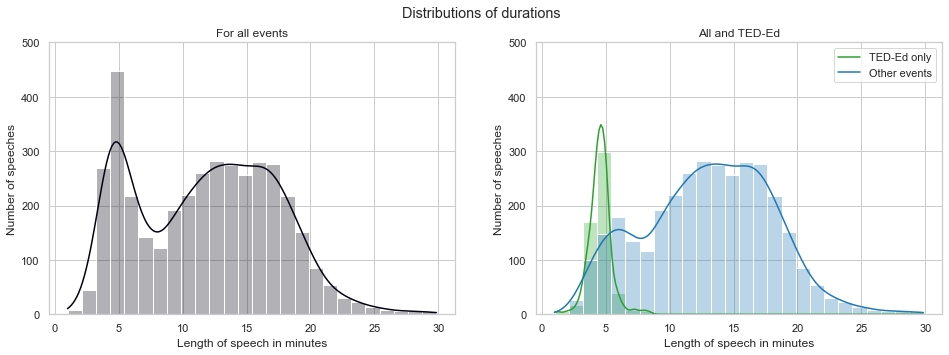

In [62]:
# plot duration distributions
fig, axs = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Distributions of durations')
bins = 26

sns.histplot(teds_cropped_30min.duration_min, bins=bins, ax=axs[0], color='#000110', alpha = .3, kde = True)
teds_cropped_30min['label_by_teded'] = teds_cropped_30min.event_flat.apply(lambda x: 'TED-Ed' if x == 'TED-Ed' else 'Another TED')

palette = ['tab:blue', 'tab:green']
sns.histplot(data=teds_cropped_30min, 
             x='duration_min', 
             bins=bins, 
             ax=axs[1], 
             color=['#488dc0'], 
             alpha = .3, 
             kde = True, 
             palette=palette, 
             hue='label_by_teded')#, hue='event_flat')

ylim = 500
axs[0].set_ylim(0,ylim)
axs[1].set_ylim(0,ylim)
axs[1].legend(['TED-Ed only', 'Other events'])# 
axs[0].title.set_text('For all events')
axs[1].title.set_text('All and TED-Ed')
axs[0].set_xlabel('Length of speech in minutes')
axs[1].set_xlabel('Length of speech in minutes')
axs[0].set_ylabel('Number of speeches')
axs[1].set_ylabel('Number of speeches')

plt.show()

For sure we observe a special format of TED-Ed events - about 5 minutes
Let's explore a distribution of durations in rest events on the next kde graph

In [63]:
# teds_cropped_30min.event_flat.unique()

In [64]:
# Rearrange events for KDEplot
def send_item_to_top(lst, item):
        lst.remove(item)
        lst.insert(0, item)
        return lst
    
events_list_orig = list(teds_cropped_30min.event_flat.unique())
# print(events_list_orig)
events_list = send_item_to_top(events_list_orig, 'TED-Ed')
events_list = send_item_to_top(events_list, 'TEDYouth')    
events_list = send_item_to_top(events_list, 'TED Residency')
# events_list
clr_deep_remapped, new_indexes_to_show = remap_clr_list_by_two_lists(events_limited.index, events_list, clr_deep)

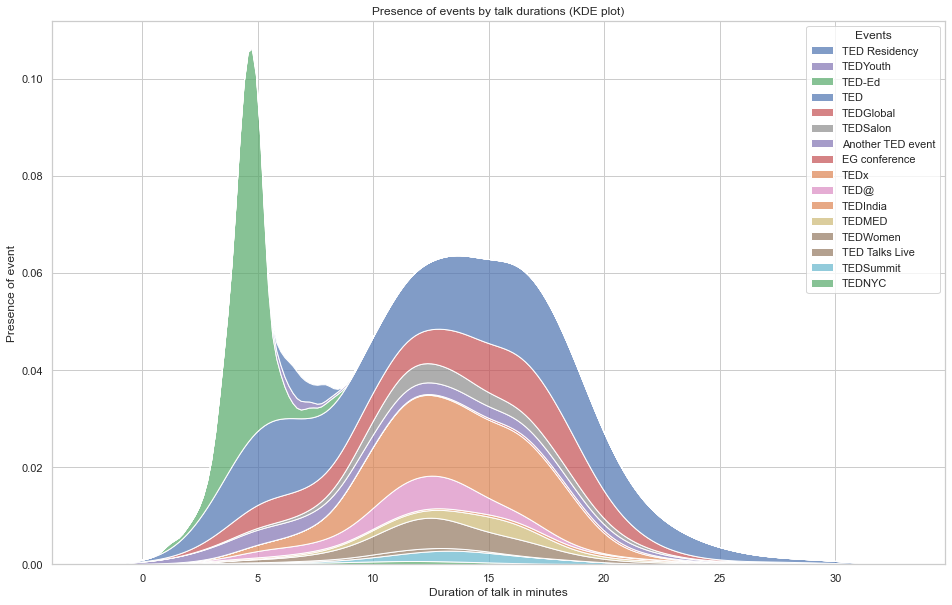

In [65]:
plt.subplots(figsize=(16,10))
palette = clr_deep_remapped
# palette = hex_clr
teds_cropped_30min.rename(columns = {'event_flat':'Events'}, inplace = True)

sns.kdeplot(data=teds_cropped_30min,
             x='duration_min',
             multiple='stack',
             alpha = .7,
             lw=1,
             hue='Events',
             palette=palette,
             hue_order=events_list,
#              legend=False
             )
plt.xlabel('Duration of talk in minutes')
plt.ylabel('Presence of event')
plt.title('Presence of events by talk durations (KDE plot)')
# plt.legend(title='Events', loc='upper right', labels=events_list)
plt.show()
teds_cropped_30min.rename(columns = {'Events':'event_flat'}, inplace = True)

We clearly observe predominance of five-minutes long speeches in TED-Ed and couple more small events.

Rest events have a normal distribution with dominance of 12-15 minutes and small inflations at 5-7 minutes durations




####  Are the most popular talks from the most popular topics? <a class="anchor" id="popular"></a>
Number of speech views and comments will be a marker of it's popularity<br>
We will check our hypotesis by calculation of correlation coefficient between rating of speech topic and views, comments. <br>
Significant negative correlation there will approve our hypotesis. 
Oterway the null hypotesis is right - there is no strong connection between topic and popularity of some TED speech

In [66]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [68]:
# get large topic list to check connection between speech popularity and it's topic rating
n_topic = 100
teds_popular_topics_100 = get_teds_popular_topics(teds, topics_list_flat_df, n_topic)

3984 total TED talks in result list
99 categories

Number of talks by categories: 
(by limited popular topics list)
business          297
culture           229
animation         194
art               184
activism          165
                 ... 
mind                3
visualizations      2
world cultures      2
motivation          2
potential           1
Name: topics_clean, Length: 99, dtype: int64


3984
3340


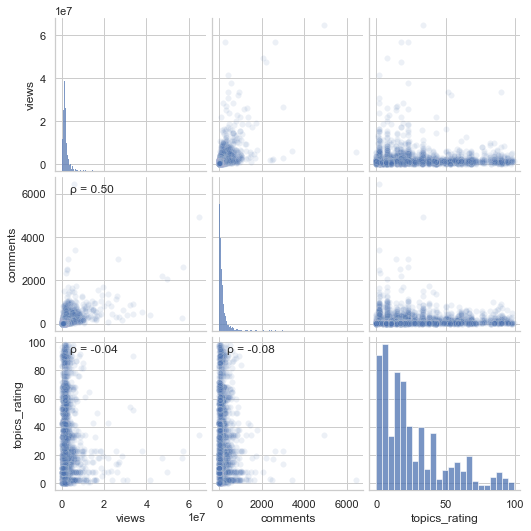

In [69]:
teds_num = teds_popular_topics_100[['views', 'comments', 'topics_clean', 'topics_rating']]
print(len(teds_num))
teds_num_clean = teds_num.dropna()
print(len(teds_num_clean))
# correlation pairplot check
# g = sns.pairplot(teds_num_clean, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
g = sns.pairplot(teds_num_clean, plot_kws={'alpha':0.1})
g.map_lower(corrfunc)
plt.show()

In [70]:
teds_num.corr()

,views,comments,topics_rating
views,1.000000,0.500645,-0.040319
comments,0.500645,1.000000,-0.079108
topics_rating,-0.040319,-0.079108,1.000000


There is a medium to strong correlation between number of views and number of comments, make sense, it's our marker for popular talks.<br>
Looking at `topics_rating` we decline our hypotesis - there is no correlation between topic rating and popularity of some TED talk

In [71]:
# compare comments between topics
# plt.subplots(figsize=(16,10))
# sns.boxplot(data=teds_num_clean, x=teds_num_clean.topics_clean.str.capitalize(), y='comments')
# plt.xticks(fontsize=12, rotation=90)
# plt.title('Distribution of comments number between topics')
# plt.xlabel('Topics')
# plt.ylabel('Number of comments')
# plt.ylim(0,None)
# plt.show()

** **  
# 4. ML part <a class="anchor" id="ML_part"></a>

### Prediction of topic by transcript <a class="anchor" id="prediction"></a>

In [90]:
# get large topic list to check connection between speech popularity and it's topic rating
n_topic = 15 #  15-37%
teds_popular_topics_ml = get_teds_popular_topics(teds, topics_list_flat_df, n_topic)

3519 total TED talks in result list
15 categories

Number of talks by categories: 
(by limited popular topics list)
culture          435
business         403
science          355
design           350
global issues    295
animation        281
technology       215
health           208
biology          189
education        186
humanity         159
history          148
social change    137
society           85
innovation        73
Name: topics_clean, dtype: int64


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

We will try to predict topic of TED talk by it's trancript, will use short list of topics - 15

In [92]:
print('Popular topics after simplification:\n', teds_popular_topics_ml['topics_clean'].unique())
print(len(teds_popular_topics_ml), 'TED talks included')

Popular topics after simplification:
 ['culture' 'global issues' 'technology' 'business' 'design' 'biology'
 'health' 'science' 'history' 'education' 'humanity' 'society'
 'innovation' 'social change' 'animation']
3519 TED talks included


Splitting the dataset to train and test subsets, test subset will be 20%

In [93]:
# split set to test and train
X = teds_popular_topics_ml['transcript'] + teds_popular_topics_ml['description'] + teds_popular_topics_ml['description']
# X = teds_popular_topics['description']

Y = np.array(teds_popular_topics_ml['topics_rating'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [94]:
# # split set to test and train - short for test
# teds_popular_topics_short = teds_popular_topics.head(100) # for tests
# from sklearn.model_selection import train_test_split
# X = teds_popular_topics_short['transcript']
# # X = teds_popular_topics['description']

# Y = np.array(teds_popular_topics_short['topics_rating'])
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [95]:
print(len(Y_train), '- train set')
print(len(Y_test), '- test set')

2815 - train set
704 - test set


Firstly will try to predict topic by Naive Bayes Classifier

In [96]:
# Building a pipeline:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, Y_train)

In [97]:
# Performance of NB Classifier
predicted = text_clf.predict(X_test)
# print(predicted, Y_test)
# show_predictions_vs_targets(predicted, Y_test)
NB_mean_true = np.mean(predicted == Y_test)*100
print(round(NB_mean_true, 2), '- not too much...')

18.18 - not too much...


about 18% of right answers, better than guessung (it wold give us 7%)

Let's try another method - train <b>Support Vector Machines</b> model

In [98]:
# Training Support Vector Machines - SVM and calculating its performance
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=20, random_state=42))])
text_clf_svm = text_clf_svm.fit(X_train, Y_train)
predicted_svm = text_clf_svm.predict(X_test)
SVM_mean_true = np.mean(predicted_svm == Y_test)*100
round(SVM_mean_true, 2)

36.65

about 37% of right answers!<br>
Looks better, but our transcript was not preprocessed for best result, we will import stemmer and maybe it will improve performance a bit

In [99]:
#@title
# Stemming Code
import nltk
nltk.download('popular') # download in once

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect),
                             ('tfidf', TfidfTransformer()), 
                              ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=20, random_state=42))])
text_mnb_stemmed = text_mnb_stemmed.fit(X_train, Y_train)

predicted_mnb_stemmed = text_mnb_stemmed.predict(X_test)
SVM_stemmed_mean_true = np.mean(predicted_mnb_stemmed == Y_test)*100
SVM_stemmed_mean_true

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Lev\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Lev\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Lev\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Lev\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Lev\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\

33.94886363636363

In [100]:
# compare models
print('Performance of SVM model slightly better without stemming and significantly better than NB')
print('Right answers:')
print('Naive Bayes: {0:.2f}%'.format(NB_mean_true))
print('SVM stemmed: {0:.2f}%'.format(SVM_stemmed_mean_true))
print('SVM:         {0:.2f}%'.format(SVM_mean_true))

Performance of SVM model slightly better without stemming and significantly better than NB
Right answers:
Naive Bayes: 18.18%
SVM stemmed: 33.95%
SVM:         36.65%


37% is not so much, but remember - we choose from 15 options, so random guessing give us less than 7%

This problem may be not solvable this way, because we get topics for every talk from number topics and it's not a clear category initially.<br>
There is a room to improvement anyway

### Clusterization <a class="anchor" id="clusterization"></a>
Maybe talks could be divided better by clusterzation than by category from most popular topic tag<br>
We will generate a limited list of topics again to check it<br>
<b>remark:</b> there is no meaning for presetted categories for silhuette check, only number of clusters is important, we will check which number suits better.<br> Still we'll use our data with categories for homogenity check, maybe it will be close enough

In [94]:
# get topics list for comparing with clusterization
n_topic = 10
teds_popular_topics_for_cluster = get_teds_popular_topics(teds, topics_list_flat_df, n_topic)
# teds_popular_topics_for_cluster

3348 total TED talks in result list
10 categories

Number of talks by categories: 
(by limited popular topics list)
science          530
culture          471
business         411
design           376
animation        351
global issues    325
technology       267
health           252
social change    210
society          155
Name: topics_clean, dtype: int64


Make a DataFrame only with columns includig text(transcript) for clusterization:

In [95]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
# teds_popular_topics
random_state = 0
teds_text = teds_popular_topics_for_cluster[['transcript', 'topics_clean', 'topics_rating']]

Here we have a table with texts and categories (by string and by number).<br> We need to preprocess text before clusterization

In [96]:
teds_text.head(5)

,transcript,topics_clean,topics_rating
0,"Thank you so much, Chris. And it's truly a gre...",culture,2.0
1,"About 10 years ago, I took on the task to teac...",global issues,3.0
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology,1.0
3,If you're here today — and I'm very happy that...,business,8.0
4,Good morning. How are you? (Audience) Good. It...,culture,2.0


In [97]:
# Stemming
import regex as re
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
teds_text.transcript = teds_text.transcript.replace('\n', '')
text_for_stem = list(teds_text.transcript)
splitted_text = [line.split(sep=" ") for line in text_for_stem] 
stemmed_text = [[stemmer.stem(token) for token in line] for line in splitted_text]
stemmed_text = [[re.sub(r"\p{P}+", "", text) for text in line] for line in stemmed_text]
stemmed_text = [[text.lower() for text in line] for line in stemmed_text]
stemmed_text = [[re.sub(r"\n", "", text) for text in line] for line in stemmed_text]
# df['stemmed'] = stemmed_text

# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_text = [[lemmatizer.lemmatize(token) for token in line] for line in stemmed_text]
lemmatized_text = [' '.join(line) for line in stemmed_text]

teds_text['preprocessed'] = lemmatized_text
teds_text.preprocessed = teds_text.preprocessed.replace('  ', '')
teds_text = teds_text.drop(columns=['transcript']) # Get rid of the original column.
teds_text.rename(columns = {'preprocessed':'transcript'}, inplace = True) # replace by pre-processed


In [98]:
# len(teds_text)

In [99]:
teds_text.head()
# teds_text.topics_clean.unique()

,topics_clean,topics_rating,transcript
0,culture,2.0,thank you so much chris and it truli a great h...
1,global issues,3.0,about 10 year ago i took on the task to teach ...
2,technology,1.0,music the sound of silence simon garfunkel he...
3,business,8.0,if your here today and im veri happi that you...
4,culture,2.0,good morning how are you audience good it been...


In [100]:
teds_text.transcript.values.shape

(3348,)

In [101]:
# Feature extraction
vec = TfidfVectorizer(stop_words="english", ngram_range=(1,1), max_df = 100)
vec.fit(teds_text.transcript.values)
features = vec.transform(teds_text.transcript.values)

In [102]:
# print(features)
features.shape
# features

(3348, 70555)

In [103]:
# Model training
cls = MiniBatchKMeans(n_clusters=limit, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(n_clusters=20, random_state=0)

In [104]:
# predict cluster labels for new dataset
cls.predict(features)

cls.labels_
# cls.n_features_in_

array([ 8, 14, 19, ..., 19,  8,  8])

In [105]:
# Visualization
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

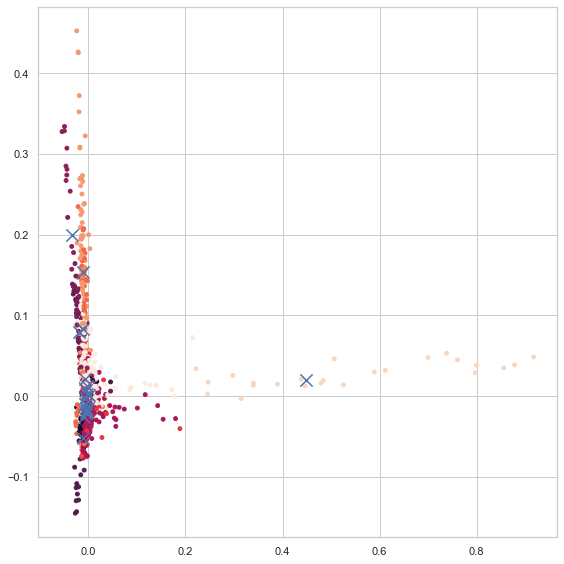

In [106]:
plt.subplots(figsize=(8,8))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features), s=15)
plt.scatter(reduced_cluster_centers[:,0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.tight_layout()
plt.show()

In [107]:
# import plotly.express as px
fig = px.scatter(x=reduced_features[:,0], y=reduced_features[:,1], color=cls.predict(features))
fig.show()

In [108]:
# Evaluation of model
# cheking the homogenity score,vthe score ranges between 0 and 1 
# where 1 stands for perfectly homogeneous labeling, 0 for all labels are wrong
from sklearn.metrics import homogeneity_score
homogeneity_score(teds_text.topics_clean, cls.predict(features))

0.05317021926618925

<b>Silhouette Coefficient</b> <br>
Best value is <b>1</b><br>
Worst value is <b>-1</b><br>
Values near <b>0</b> - overlapping clusters.<br>

In [109]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.001169672835524583

Let's look which number of clusters will give us best result 

In [110]:
"""
Make a function to check number of clusters
input: df, n-range
output lists: homogeneity_score_list, silhouette_score_list
"""
def check_n_clusters(teds_text, ranges_list):
    homogeneity_score_list = []
    silhouette_score_list = []
    # for i in n_clusters_range:
    for i in ranges_list:
        # Feature extraction
        vec = TfidfVectorizer(stop_words="english", ngram_range=(1,1), max_df = 100)
        vec.fit(teds_text.transcript.values)
        features = vec.transform(teds_text.transcript.values)
        # Model training
        cls = MiniBatchKMeans(n_clusters=i, random_state=random_state)
        cls.fit(features)
        # predict cluster labels for new dataset
        cls.predict(features)
        new_labels = cls.labels_
        # Evaluation of model
        # Homogenity score check
        homogeneity_score_list.append(homogeneity_score(teds_text.topics_clean, cls.predict(features)))
        # Silhouette score
        silhouette_score_list.append(silhouette_score(features, cls.predict(features)))
    return homogeneity_score_list, silhouette_score_list#, new_labels

In [111]:
# ranges_list = [x/100 for x in range(2,100, 5)]
n_clusters_range = list(range(5, 20))
# ranges_list

In [112]:
# *** commented out to save processing time ***
homogeneity_score_list, silhouette_score_list = check_n_clusters(teds_text, n_clusters_range)

In [254]:
# homogeneity_score_list = [0.010724405893593879, 0.012699818284048004, 0.03206928770905556, 0.013852973349004585, 0.02485049750564931, 0.022247757115643117, 0.03389112443470065, 0.030397147023917496, 0.02870376480303936, 0.030981840603403893, 0.04158961317781879, 0.04791677521366366, 0.029200404933715507, 0.024760680175962734, 0.03358182046117576, 0.03546647739062183, 0.03406781962599433, 0.03878778137511811, 0.03364453017679, 0.03387073879686944, 0.051940217816472636, 0.04675497146379536, 0.04224384328368273, 0.03793066494317613, 0.0069705028423326515, 0.04225965492049248, 0.04184606541371012, 0.04614403952325749]

In [253]:
# silhouette_score_list = [0.0009601407203151355, 0.0007140629052739866, 0.0008001244285979596, 0.0010958832095584318, 0.0008604165773194861, 0.001727700561581918, 0.0010775671687264458, 0.0012986488391126935, 0.0017169829750830594, 0.001272496915148335, 0.0014092773015067215, 0.0018218474316711543, 0.0009139342109133895, 0.0006870856314836826, 0.0017269037059208798, 0.0011883068175637026, -0.00037530706010934796, -0.00048731771659354814, -0.001828909098846983, -0.00033061091350688494, 0.0008171739683441765, 0.0016417339667954384, 0.0006007988046871469, -0.0014046571955361774, -0.012319104331662044, -7.387600475827813e-05, -0.000527052369958123, -0.002934679824373918]

In [160]:
# len(n_clusters_range)

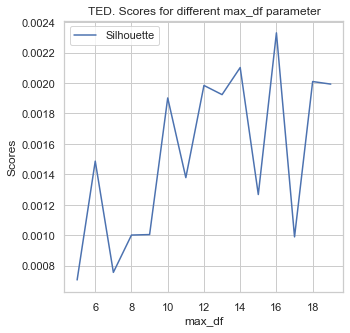

In [113]:
# plt.plot(n_clusters_range, homogeneity_score_list)
plt.plot(n_clusters_range, silhouette_score_list)
plt.xlabel('max_df')
plt.ylabel('Scores')
plt.legend(['Silhouette'])#['Homogeneity']
plt.title('TED. Scores for different max_df parameter')
plt.show()

### Conclusion <a class="anchor" id="Conclusion"></a>

#### Comments <a class="anchor" id="section_5_1"></a>
<br>
In this project, the following was accomplished: <br>take data from Kaggle, filter and clean data, explore the dataset by different features, preprocess attributes, make ML categorization on Support Vector Machines model, based on pre-processed topic tags, apply 
Unsupervised Machine Learning - clusterization and check more suitable number of clusters 

#### Next steps <a class="anchor" id="section_5_2"></a>
Improve hiperparameters for ML part, preprocess text better to get more reliable results,
maybe use AffnityPropagation to get best number of clusters